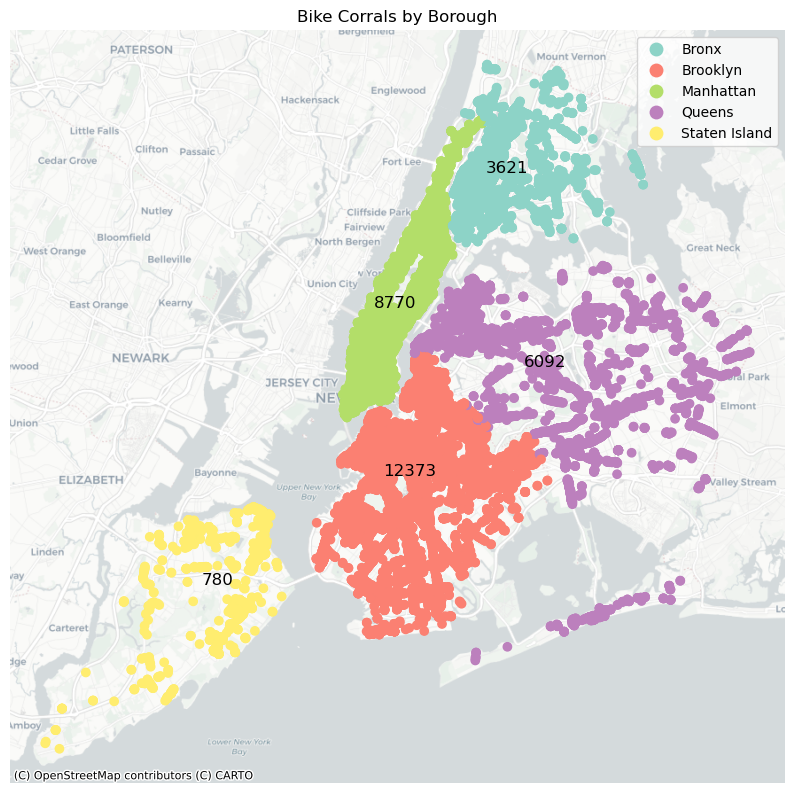

In [13]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Readshapefile
path = r'C:\Users\david\Downloads\Bicycle Parking\geo_export_e0c305b7-2a6f-444b-92b5-6e2c4936ae7a.shp'
shp_data = gpd.read_file(path)

# mercator projection to epsg
shp_data_web = shp_data.to_crs(epsg=3857)

# group count by bororo
borough_counts = shp_data.groupby('boro_name').size().reset_index(name='counts')

# centroid calculations
borough_points = shp_data_web.dissolve(by='boro_name')['geometry'].centroid

# Adding if condition for none values
borough_counts['geometry'] = [point if point is not None else None for point in borough_points]
borough_counts_gdf = gpd.GeoDataFrame(borough_counts, geometry='geometry')

# plot the map
ax = shp_data_web.plot(column='boro_name', categorical=True, legend=True, cmap='Set3', figsize=(10, 10))
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Adding numbers totals for each borough and skip none
for idx, row in borough_counts_gdf.iterrows():
    if row.geometry is not None:
        plt.text(row.geometry.x, row.geometry.y, str(row['counts']), fontsize=12, ha='center')

plt.title('Bike Corrals by Borough')
plt.axis('off')
plt.show()

In [2]:
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
from IPython.display import display
import ipywidgets as widgets

# Read the shapefile
path = r'C:\Users\david\Downloads\Bicycle Parking\geo_export_e0c305b7-2a6f-444b-92b5-6e2c4936ae7a.shp'
shp_data = gpd.read_file(path)

# Get the unique neighborhoods
neighborhood_options = sorted(shp_data['ntaname'].unique())

# Function to create and display the map for a specific neighborhood
def create_map(neighborhood):
    # Calculate the mean latitude and longitude
    mean_latitude = shp_data.geometry.y.mean()
    mean_longitude = shp_data.geometry.x.mean()

    # Create the map object
    m = folium.Map(location=[mean_latitude, mean_longitude], tiles='CartoDB Positron', zoom_start=10)

    # Create a FeatureGroup for neighborhoods
    neighborhoods = folium.FeatureGroup(name='Neighborhoods')

    # Loop through the unique neighborhoods
    neighborhood_data = shp_data[shp_data['ntaname'] == neighborhood]
    marker_cluster = MarkerCluster(name=neighborhood).add_to(neighborhoods)

    # Add points to the neighborhood cluster
    for idx, row in neighborhood_data.iterrows():
        location = [row.geometry.y, row.geometry.x]
        popup_text = f"Address: {row['ifoaddress']}\nRack Type: {row['rack_type']}\nDate Installed: {row['date_date_']}"
        popup = folium.Popup(popup_text, parse_html=True)
        folium.Marker(location=location, popup=popup).add_to(marker_cluster)

    # Add neighborhoods FeatureGroup to the map
    neighborhoods.add_to(m)

    # Add layer control to toggle between neighborhoods
    folium.LayerControl().add_to(m)

    # Show the map
    display(m)

# Create a dropdown menu for neighborhoods
dropdown = widgets.Dropdown(
    options=neighborhood_options,
    description='Neighborhood:',
    disabled=False,
)

# Interact with the dropdown to render the map
widgets.interact(create_map, neighborhood=dropdown)


interactive(children=(Dropdown(description='Neighborhood:', options=('Allerton', 'Alley Pond Park', "Annadale-…

<function __main__.create_map(neighborhood)>

In [1]:
import folium
import geopandas as gpd
from IPython.display import display
import ipywidgets as widgets

# Read the shapefile
path = r'C:\Users\david\Downloads\Bicycle Parking\geo_export_e0c305b7-2a6f-444b-92b5-6e2c4936ae7a.shp'
shp_data = gpd.read_file(path)

# Get the unique neighborhoods
neighborhood_options = sorted(shp_data['ntaname'].unique())

# Function to create and display the map for a specific neighborhood
def create_map(neighborhood):
    # Calculate the mean latitude and longitude
    mean_latitude = shp_data.geometry.y.mean()
    mean_longitude = shp_data.geometry.x.mean()

    # Create the map object
    m = folium.Map(location=[mean_latitude, mean_longitude], tiles='CartoDB Positron', zoom_start=10)

    # Create a FeatureGroup for neighborhoods
    neighborhoods = folium.FeatureGroup(name='Neighborhoods')

    # Loop through the unique neighborhoods
    neighborhood_data = shp_data[shp_data['ntaname'] == neighborhood]

    # Add points to the neighborhood
    for idx, row in neighborhood_data.iterrows():
        location = [row.geometry.y, row.geometry.x]
        popup_text = f"Address: {row['ifoaddress']}\nRack Type: {row['rack_type']}\nDate Installed: {row['date_date_']}"
        popup = folium.Popup(popup_text, parse_html=True)
        folium.Marker(location=location, popup=popup).add_to(neighborhoods)

    # Add neighborhoods FeatureGroup to the map
    neighborhoods.add_to(m)

    # Add layer control to toggle between neighborhoods
    folium.LayerControl().add_to(m)

    # Show the map
    display(m)

# Create a dropdown menu for neighborhoods
dropdown = widgets.Dropdown(
    options=neighborhood_options,
    description='Neighborhood:',
    disabled=False,
)

# Interact with the dropdown to render the map
widgets.interact(create_map, neighborhood=dropdown)


interactive(children=(Dropdown(description='Neighborhood:', options=('Allerton', 'Alley Pond Park', "Annadale-…

<function __main__.create_map(neighborhood)>